### Imports

In [98]:
from hw2skeleton.k_means import *
from hw2skeleton import io
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import jaccard_similarity_score

### Testing

In [8]:
sites = io.read_active_sites('data')
simMat = compute_similarity_matrix(sites)

Read in 136 active sites


The loop below computes k means clustering on the given sites for k = 2 through k = 9. 
Each k is given 10 random starts in order to maximize the chance of finding true optimum clusters. Then the minumum silhouette score for each of the 10 versions is reported for each value of k. This is output into a nested list for easy plotting with matplotlib

In [ ]:
points = [[],[]]
for i in range(2,11):
    points[0].append(i)
    points[1].append(avg_sl(sites, i , simMat))

In [ ]:
for i in range(len(points[1])):
    points[1][i] = sum(points[1][i]) / 50

In [ ]:
points[0]

In [ ]:
points[1]

In [ ]:
l = [0,2,3,10,2]

In [ ]:
l.index(max(l))

In [ ]:
plt.scatter(points[0], points[1])
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score (Euclidean Distance)')

In [6]:
def make_repr_data_frame(sites):
    df = pd.DataFrame(index = aa3, columns = simMat.columns )
    for site in sites:
        df[site.name] = site.counts
    return df

In [ ]:
a

### Finals

In [2]:
clusters, sc = main()

Read in 136 active sites


In [52]:
clusters.keys()

dict_keys([0, 1])

2

In [4]:
sc

[0.7269049869588957]

In [37]:
a = make_repr_data_frame(sites).T

In [38]:
a

,ALA,CYS,ASP,GLU,PHE,GLY,HIS,ILE,LYS,LEU,MET,ASN,PRO,GLN,ARG,SER,THR,VAL,TRP,TYR
46495,0,0,4,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
23812,0,0,2,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
41729,0,0,4,2,0,0,0,0,4,0,0,0,0,0,0,2,2,0,0,0
91911,0,0,4,0,0,0,0,0,2,0,0,2,0,0,2,4,2,0,0,2
82212,0,0,2,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72058,0,0,4,4,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0
34958,0,0,8,4,0,0,4,0,4,0,0,8,0,0,0,0,0,0,0,0
41719,0,0,4,4,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0
97612,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
pca = PCA(n_components=2)

In [39]:
p = pca.fit_transform(a)

In [91]:
principalDf = pd.DataFrame(data = p
             , columns = ['principal component 1', 'principal component 2'], index = simMat.index)

In [83]:
def make_cluster_assign_df(clusters, simMat):
    assgn = pd.DataFrame(index = simMat.index, columns = ['Cluster Assignment'])
    for cluster in clusters.keys():
        for site in clusters[cluster]:
            assgn.loc[site.name] = cluster
    return assgn

In [84]:
assgn = make_cluster_assign_df(clusters, simMat)

In [93]:
finalDf = pd.concat([principalDf, assgn[['Cluster Assignment']]], axis = 1)

In [94]:
finalDf

,principal component 1,principal component 2,Cluster Assignment
46495,1.314281,-1.491680,0
23812,-0.273623,-2.786831,0
41729,2.539998,-1.913323,0
91911,2.442644,-1.556242,0
82212,-0.275826,-2.561466,0
...,...,...,...
72058,1.957383,-2.270334,0
34958,4.045416,3.011137,0
41719,1.957383,-2.270334,0
97612,-3.408945,0.572934,0


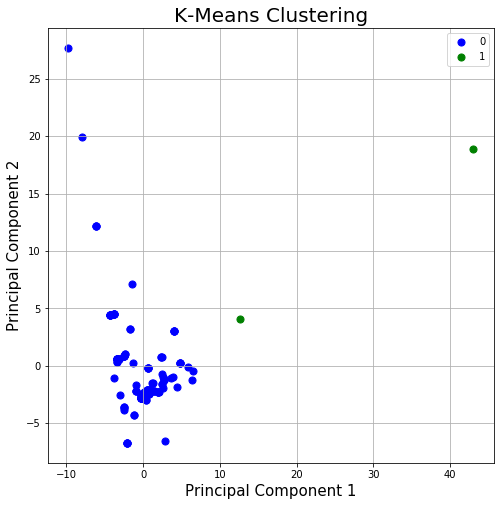

In [99]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('K-Means Clustering', fontsize = 20)
targets = clusters.keys()
colors = ['b', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Cluster Assignment'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
jaccard_similarity_score(y_true, y_pred)